# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# I have opted to do a paliminary output file and a final output file
    # to give me more control over vetting results
output_data_file = "output_data/cities.csv"
final_output_data_file = "output_data/cities_final.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

In [3]:
# This was used to look at the cities structure
# print(cities)

['adre', 'sao joao da barra', 'hobart', 'barrow', 'yithion', 'broome', 'busselton', 'de aar', 'nanortalik', 'coquimbo', 'benxi', 'vardo', 'lata', 'cape town', 'severo-kurilsk', 'alabel', 'villa maria', 'kosh-agach', 'kieta', 'avarua', 'puerto escondido', 'souillac', 'lagoa', 'punta arenas', 'ratnagiri', 'ahuimanu', 'saskylakh', 'ushuaia', 'arman', 'tiksi', 'pacific grove', 'salalah', 'rikitea', 'barentsburg', 'airai', 'mataura', 'hermanus', 'tabat', 'lebu', 'atuona', 'saldanha', 'clyde river', 'putai', 'bilibino', 'saint-philippe', 'san cristobal', 'hobyo', 'berdigestyakh', 'kapaa', 'khatanga', 'longyearbyen', 'wanaka', 'rotenburg', 'tawzar', 'manavalakurichi', 'buala', 'cosamaloapan', 'albany', 'bad liebenzell', 'fairbanks', 'mongomo', 'faanui', 'mar del plata', 'olutanga', 'canillo', 'poronaysk', 'katsuura', 'vaini', 'bograd', 'bara', 'chokurdakh', 'cidreira', 'srednekolymsk', 'alofi', 'opotiki', 'butaritari', 'bujaru', 'aden', 'praia da vitoria', 'aklavik', 'norman wells', 'poum', '

In [4]:
### Saving out the city pull [swithcer between the full and 10]

##### --------- NOTE THAT WE CAN SWITCH BETWEEN RUNNING 10 and RUNNING ALL ---------------
# Switch the # between the next two lines to get ether all of the cities or just the first 10

# all cities
cities_df = pd.DataFrame(cities, columns=["city"])

# Just the first 10 cities
# cities_df = pd.DataFrame(cities[:10], columns=["city"])

# Creates the CSV file
cities_df.to_csv(output_data_file, header=True, index=False)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# This section pulls the data for each city

# get the API key
from api_keys import api_key


# from urllib2 import HTTPError
from urllib.error import HTTPError

colnames = ['city']
data = pd.read_csv(output_data_file, names=colnames)
cities_list = data.city.tolist()

# removes the word Cities from our list
del cities_list[0]
# print(cities_list)

# Create settings dictionary with information we're interested in, including the URL
settings = {"units": "imperial", "appid": api_key}
url = "https://api.openweathermap.org/data/2.5/weather?q="

# adds the fields we need to the dataframe
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
maxtemp = []
windspeed = []
i = 0

# runs the for/try/except loop for getting the data for each city

for city in cities_list:
    try:
        response = requests.get(url + city + "&units=imperial" + "&appid=" + api_key).json()
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        i = i + 1
        print(f"Processing Record {i} of {len(cities_list)} | {city}")
        time.sleep(1)
    except Exception as x:
#         print(x)
        print(f"City not found. Skipping ", city)
        pass

  
# adds the data we got into the dataframe

weather_data = pd.DataFrame({
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": maxtemp,
    "Wind Speed": windspeed})

# outputs our updated dataframe to screen for valadation
weather_data    



Processing Record 1 of 621 | adre
Processing Record 2 of 621 | sao joao da barra
Processing Record 3 of 621 | hobart
Processing Record 4 of 621 | barrow
City not found. Skipping  yithion
Processing Record 5 of 621 | broome
Processing Record 6 of 621 | busselton
Processing Record 7 of 621 | de aar
Processing Record 8 of 621 | nanortalik
Processing Record 9 of 621 | coquimbo
Processing Record 10 of 621 | benxi
Processing Record 11 of 621 | vardo
Processing Record 12 of 621 | lata
Processing Record 13 of 621 | cape town
Processing Record 14 of 621 | severo-kurilsk
Processing Record 15 of 621 | alabel
Processing Record 16 of 621 | villa maria
Processing Record 17 of 621 | kosh-agach
Processing Record 18 of 621 | kieta
Processing Record 19 of 621 | avarua
Processing Record 20 of 621 | puerto escondido
Processing Record 21 of 621 | souillac
Processing Record 22 of 621 | lagoa
Processing Record 23 of 621 | punta arenas
Processing Record 24 of 621 | ratnagiri
Processing Record 25 of 621 | ahui

Processing Record 192 of 621 | leshukonskoye
Processing Record 193 of 621 | nantucket
Processing Record 194 of 621 | kavaratti
Processing Record 195 of 621 | emerald
Processing Record 196 of 621 | kefamenanu
Processing Record 197 of 621 | srivardhan
Processing Record 198 of 621 | tokur
Processing Record 199 of 621 | kampot
Processing Record 200 of 621 | wicklow
Processing Record 201 of 621 | portobelo
Processing Record 202 of 621 | trinidad
Processing Record 203 of 621 | toora-khem
Processing Record 204 of 621 | northam
Processing Record 205 of 621 | ventspils
Processing Record 206 of 621 | palu
City not found. Skipping  amderma
Processing Record 207 of 621 | gawler
Processing Record 208 of 621 | pangnirtung
Processing Record 209 of 621 | port lincoln
Processing Record 210 of 621 | zemio
Processing Record 211 of 621 | charters towers
Processing Record 212 of 621 | chuy
Processing Record 213 of 621 | haines junction
Processing Record 214 of 621 | semnan
Processing Record 215 of 621 | ne

City not found. Skipping  akyab
Processing Record 374 of 621 | paso de los toros
Processing Record 375 of 621 | soc trang
Processing Record 376 of 621 | bismarck
Processing Record 377 of 621 | dingle
Processing Record 378 of 621 | tay ninh
Processing Record 379 of 621 | orotukan
Processing Record 380 of 621 | sisimiut
Processing Record 381 of 621 | constitucion
Processing Record 382 of 621 | bambous virieux
Processing Record 383 of 621 | macusani
Processing Record 384 of 621 | veseloyarsk
Processing Record 385 of 621 | salinopolis
Processing Record 386 of 621 | san vicente
Processing Record 387 of 621 | muisne
Processing Record 388 of 621 | shizunai
Processing Record 389 of 621 | palana
Processing Record 390 of 621 | golspie
Processing Record 391 of 621 | aksarka
Processing Record 392 of 621 | nome
Processing Record 393 of 621 | quatre cocos
Processing Record 394 of 621 | alexandria
Processing Record 395 of 621 | sioux lookout
Processing Record 396 of 621 | khrebtovaya
Processing Recor

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Adre,8,TD,1547304635,14,13.47,22.20,92.73,5.73
1,Sao Joao da Barra,40,BR,1547301600,55,-21.64,-41.05,87.80,13.87
2,Hobart,20,AU,1547301600,71,-42.88,147.33,53.60,6.93
3,Barrow,12,AR,1547304537,69,-38.31,-60.23,79.14,16.69
4,Broome,75,GB,1547302800,81,52.47,1.45,48.92,19.46
5,Busselton,0,AU,1547304474,100,-33.64,115.35,66.90,19.37
6,De Aar,0,ZA,1547304643,15,-30.65,24.01,85.35,15.01
7,Nanortalik,92,GL,1547304644,92,60.14,-45.24,31.31,21.50
8,Coquimbo,0,CL,1547301600,56,-29.95,-71.34,69.80,4.70
9,Benxi,32,CN,1547301600,85,41.29,123.76,23.00,2.24


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# saves out our data into a CSV file
#### NOTE that we are saving it to cities_final.csv
####                                      ^^^^

weather_data.to_csv(final_output_data_file, header=True, index=False

In [7]:
# gets the count for each field so that we know that all were populated
weather_data.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [8]:
# outputs the first 5 records to screen for valadation
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Adre,8,TD,1547304635,14,13.47,22.20,92.73,5.73
1,Sao Joao da Barra,40,BR,1547301600,55,-21.64,-41.05,87.80,13.87
2,Hobart,20,AU,1547301600,71,-42.88,147.33,53.60,6.93
3,Barrow,12,AR,1547304537,69,-38.31,-60.23,79.14,16.69
4,Broome,75,GB,1547302800,81,52.47,1.45,48.92,19.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

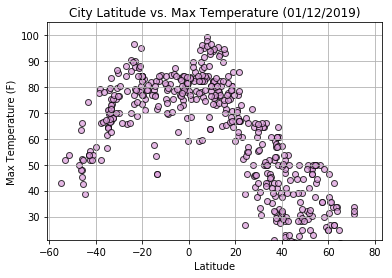

In [9]:
## plots the Latitude vs. Temperature Plot

# Obtain the x and y coordinates for the plot
plt.ylim(21,105)
# plt.ylim(21,315)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Max Temp"]

# set the colors
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Max Temperature (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# saves the file as an image and showes it on screen
plt.savefig("output_data/City_Latitude_vs_Max_Temperature.jpg", bbox_inches="tight")
plt.show()

#### Latitude vs. Humidity Plot

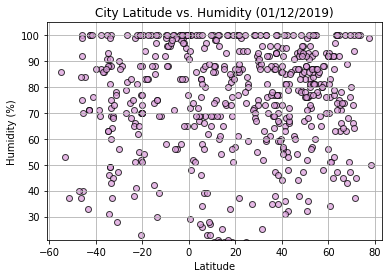

In [10]:
## Latitude vs. Humidity Plot

# Obtain the x and y coordinates for the plot
plt.ylim(21,105)
# plt.ylim(21,315)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Humidity"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Humidity (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# saves the file as an image and showes it on screen
plt.savefig("output_data/City_Latitude_vs_Humidity.jpg", bbox_inches="tight")
plt.show()

#### Latitude vs. Cloudiness Plot

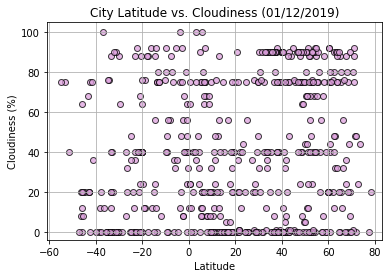

In [11]:
## Latitude vs. Cloudiness Plot

# Obtain the x and y coordinates for the plot
plt.ylim(-4,105)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Cloudiness"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Cloudiness (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# saves the file as an image and showes it on screen
plt.savefig("output_data/City_Latitude_vs_Cloudiness.jpg", bbox_inches="tight")
plt.show()

#### Latitude vs. Wind Speed Plot

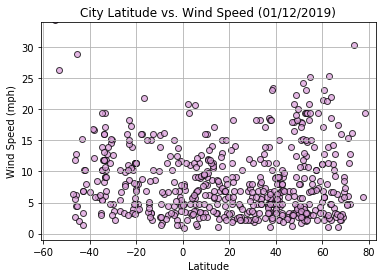

In [12]:
## Latitude vs. Wind Speed Plot

# Obtain the x and y coordinates for the plot
plt.ylim(-1,34)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Wind Speed"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Wind Speed (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/City_Latitude_vs_Wind_Speed.jpg", bbox_inches="tight")
plt.show()